In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def data_scanner(path_):
    stats = np.load(path_)
    el = stats['el']
    er = stats['er']
    E = []
    P = []
    T = []
    avalanching = False
    time_holder = 0
    energy_holder = 0
    peak_holder = 0
    data = er
    for i in range(len(data)):
        if data[i] and not avalanching:
            #print('starting avalanche', i)
            avalanching = True
            time_holder = i
            energy_holder += data[i]
            peak_holder = data[i]
        if data[i] and avalanching:
            energy_holder += data[i]
            if data[i] > peak_holder:
                peak_holder = data[i]
        if not data[i] and avalanching:
            #print('finishing avalanche', i)
            avalanching = False 
            T.append(i - time_holder)
            P.append(peak_holder)
            peak_holder = 0
            E.append(energy_holder)
            energy_holder = 0
    return E,P,T

In [3]:
E_1, P_1, T_1 = data_scanner('/home/hlamarre/PycharmProjects/AVFS/Code/Python/TestingFilesHenri/Analysis/D48.npz')
# E_2, P_2, T_2 = data_scanner('/home/hlamarre/PycharmProjects/Avalanches/interactive/Saves/AVSF_F2.npz')
# E_3, P_3, T_3 = data_scanner('/home/hlamarre/PycharmProjects/Avalanches/interactive/Saves/AVSF_F3.npz')
# E_D, P_D, T_D = data_scanner('/home/hlamarre/PycharmProjects/Avalanches/interactive/Saves/AVSF_D.npz')

In [24]:
def line(x, a, b):  # equation of a line
    return -a * x + b
def hist_(array):
    space = np.logspace(np.log10(min(array)), np.log10(max(array)), 100, base=10)  # Logspace for the fitting
    hist = np.histogram(array, bins=space, density=True)  # density histogram
    for i in range(len(hist[0])):  # transforms 0 into small values for no errors
        if hist[0][i] < 1e-15:
            hist[0][i] = 1e-15
    x = (hist[1][:-1] + hist[1][1:]) / 2  # Average the bins sides for the fitting
#     popt, pcov = curve_fit(line, np.log10(x[hist[0]>1e-10]), np.log10(hist[0][hist[0]>1e-10]))  # fitting of the line
    plt.figure()
    plt.scatter(np.log10(x[hist[0]>1e-10]), np.log10(hist[0][hist[0]>1e-10]))
#     plt.plot(np.log10(x), line(np.log10(x), popt[0], popt[1]))
    plt.show()

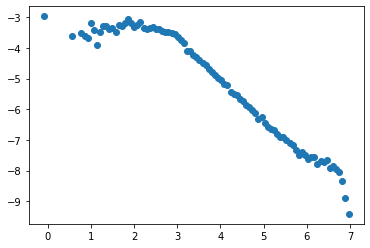

In [25]:
hist_(E_1)
# hist_(E_2)
# hist_(E_3)
# hist_(E_D)

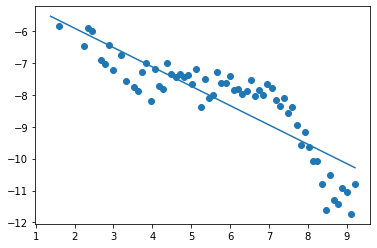

0.6064999795243693


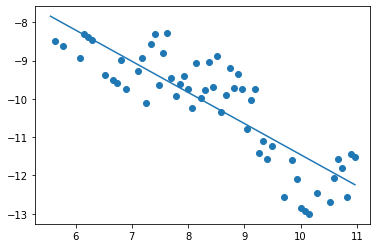

0.8124565987886676


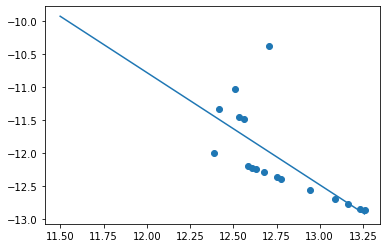

1.703085063774037


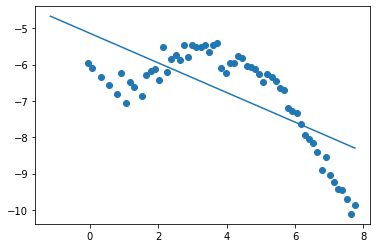

0.40819217045584544


In [13]:
hist_(P_1)
hist_(P_2)
hist_(P_3)
hist_(P_D)

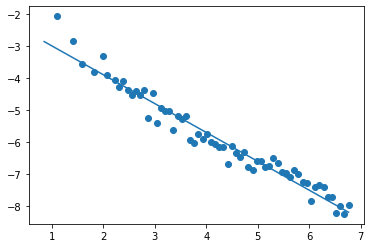

0.9044752440920951


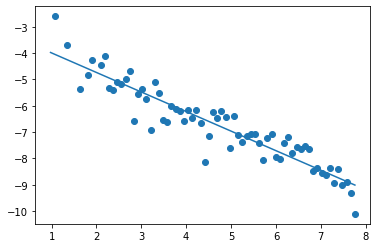

0.741756835430211


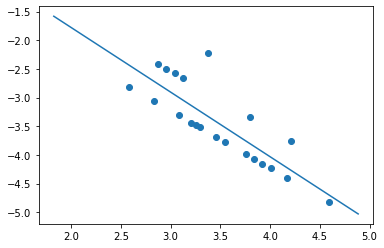

1.1271572674295682


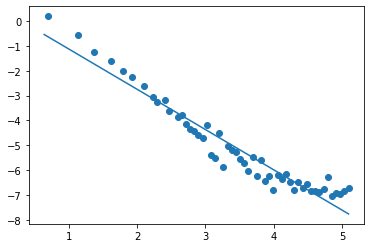

1.6188939791753594


In [14]:
hist_(T_1)
hist_(T_2)
hist_(T_3)
hist_(T_D)